
# Project: Investigate Wine Quality DataSet

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> There are two datasets that provide information on samples of red and white variants of the Portuguese "Vinho Verde" wine.Each sample of wine was rated for quality by wine experts and examined with physicochemical tests.
Due to privacy and logistic issues, only data on these physicochemical properties and quality ratings are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)

>The Attributes in Each Dataset:<br />
>1) Fixed Acidity<br />
>2) Volatile Acidity<br />
>3) Citric Acid<br />
>4) Residual Sugar<br />
>5) Chlorides<br />
>6) Free Sulfur Dioxide<br />
>7) Total Sulfur Dioxide<br />
>8) Density<br />
>9) pH<br />
>10) Sulphates<br />
>11) Alcohol<br />
>12) Quality <br />
### Question(s) for Analysis
<br />

**Q1:** which of the following variables (Volatile Acidity, Residual Sugar, pH, and Alcohol) is most likely to have a positive impact on quality?<br />
**Q2:** Is a certain type of wine (red or white) associated with higher quality? <br />
**Q3:** What level of acidity (pH value) receives the highest average rating? <br />
**Q4:** Do wines with higher alcoholic content receive better ratings? <br />
**Q5:** Do sweeter wines (more residual sugar) receive better ratings? <br />


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [4]:
# This cell is to set up import statements for all of the packages that i plan to use.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [5]:
# Loading the dataset and printing out a few lines to get a better understanding of the data
red_wine=pd.read_csv("winequality-red.csv",sep=";")
white_wine=pd.read_csv("winequality-white.csv",sep=";")

In [6]:
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#Inspecting the data types and look for instances of missing or possibly errant data.
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur-dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


>So we have 12 columns,1599 rows and no Null values. which means that we have 1599 samples of red wine 

In [8]:
red_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
red_wine.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur-dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [10]:
red_wine.duplicated().sum()

240

> It seems that we have 240 duplicated rows in the red wine dataframe.

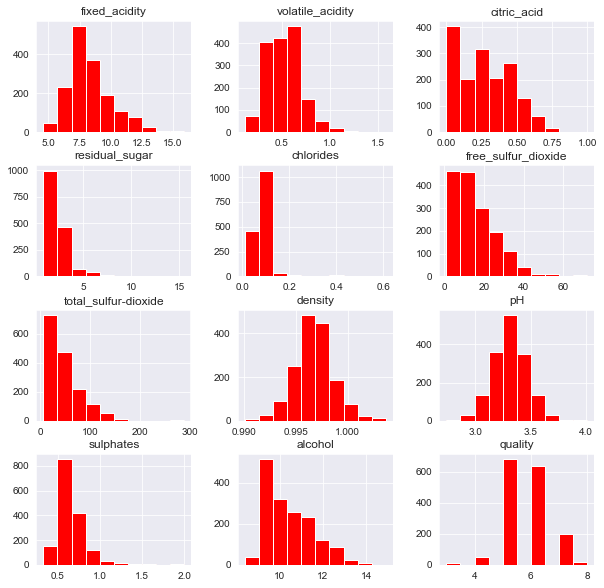

In [11]:
red_wine.hist(color='red',figsize=(10,10));

In [12]:
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
#Inspecting the data types and look for instances of missing or possibly errant data.
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


>So we have 12 columns,4898 rows and no Null values. which means that we have 4898 samples of white wine which is much more than the red wine 

In [14]:
white_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [15]:
white_wine.nunique()

fixed_acidity            68
volatile_acidity        125
citric_acid              87
residual_sugar          310
chlorides               160
free_sulfur_dioxide     132
total_sulfur_dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [16]:
white_wine.duplicated().sum()

937

> It seems that we have 937 duplicated rows in the white wine dataframe.

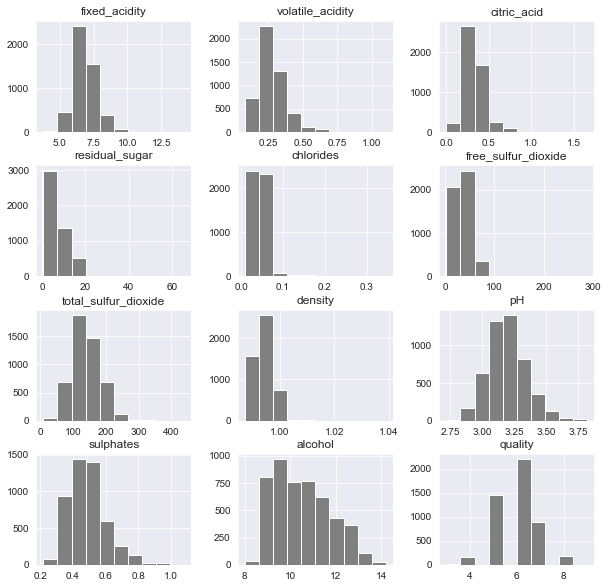

In [17]:
white_wine.hist(color='gray',figsize=(10,10));

<a id='wrangling'></a>
### Data Cleaning

> **I will start by combining the red and white datasets to make the analysis more efficient. Using NumPy to create a new column that preserves color information, and then using pandas to combine the dataframes.**

> I created two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white”.

In [18]:
# create color array for red dataframe
color_red = np.repeat('red', len(red_wine), axis=None)

# create color array for white dataframe
color_white = np.repeat('white', len(white_wine), axis=None)

> The new arrays are added to the red and white dataframes. I did this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [19]:
red_wine['color'] = color_red
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [20]:
white_wine['color'] = color_white
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [21]:
# Changed the name of the column to avoid conflict and unify the column names
red_wine=red_wine.rename(columns = {'total_sulfur-dioxide':'total_sulfur_dioxide'})

In [22]:
# append dataframes
wine_df = red_wine.append(white_wine)

In [23]:
# view dataframe to check for success
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [24]:
wine_df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [25]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


> Now the combined dataframe has 13 columns and 6497 rows in total.

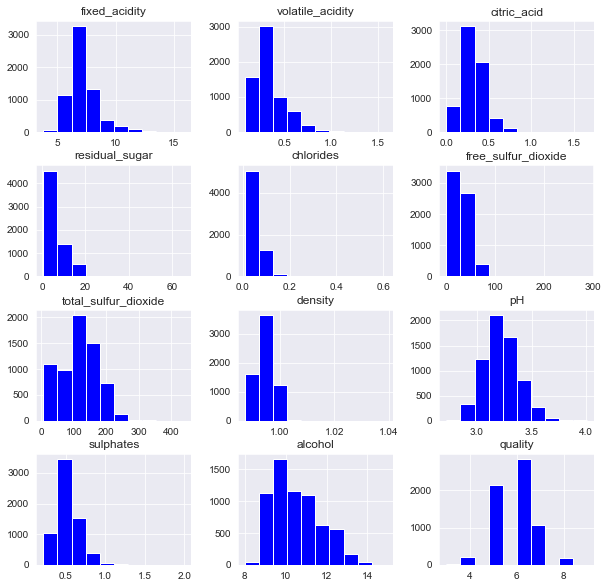

In [26]:
wine_df.hist(color='blue',figsize=(10,10));

> Based on histograms of columns in this dataset it appears that most of the columns are skewed to the right. with the exeption of **pH** and **Quality** which seem normally distributed.

<a id='eda'></a>
## Exploratory Data Analysis

### Q1: which of the following variables (Volatile Acidity, Residual Sugar, pH, and Alcohol) is most likely to have a positive impact on quality?

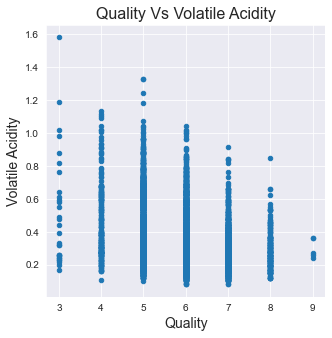

In [34]:
wine_df.plot(x="quality",y="volatile_acidity",kind='scatter',figsize=(5,5))
plt.title('Quality Vs Volatile Acidity',fontsize=16)
plt.xlabel('Quality',fontsize=14)
plt.ylabel('Volatile Acidity',fontsize=14);

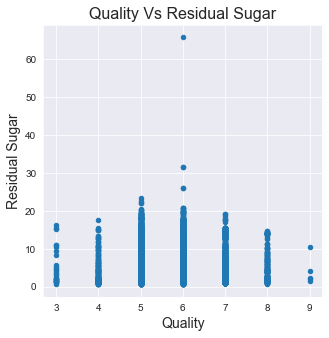

In [35]:
wine_df.plot(x="quality",y="residual_sugar",kind='scatter',figsize=(5,5))
plt.title('Quality Vs Residual Sugar',fontsize=16)
plt.xlabel('Quality',fontsize=14)
plt.ylabel('Residual Sugar',fontsize=14);

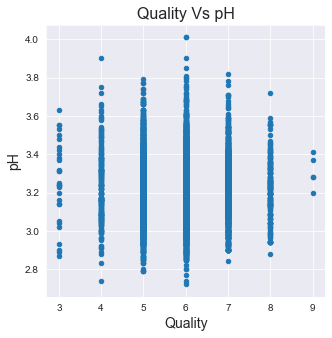

In [36]:
wine_df.plot(x="quality",y="pH",kind='scatter',figsize=(5,5))
plt.title('Quality Vs pH',fontsize=16)
plt.xlabel('Quality',fontsize=14)
plt.ylabel('pH',fontsize=14);

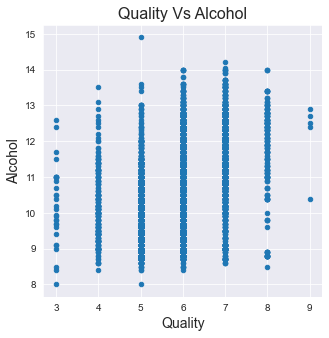

In [37]:
wine_df.plot(x="quality",y="alcohol",kind='scatter',figsize=(5,5))
plt.title('Quality Vs Alcohol',fontsize=16)
plt.xlabel('Quality',fontsize=14)
plt.ylabel('Alcohol',fontsize=14);

> **Based on scatterplots of quality against different feature variables, Alcohol is most likely to have a positive impact on quality.**

### Q2: Is a certain type of wine (red or white) associated with higher quality?

In [39]:
# Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby(['color','quality']).mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
color quality                                                                 
red   3             8.360000          0.884500     0.171000        2.635000   
      4             7.779245          0.693962     0.174151        2.694340   
      5             8.167254          0.577041     0.243686        2.528855   
      6             8.347179          0.497484     0.273824        2.477194   
      7             8.872362          0.403920     0.375176        2.720603   
      8             8.566667          0.423333     0.391111        2.577778   
white 3             7.600000          0.333250     0.336000        6.392500   
      4             7.129448          0.381227     0.304233        4.628221   
      5             6.933974          0.302011     0.337653        7.334969   
      6             6.837671          0.260564     0.338025        6.441606   
      7             6.734716          0.262767     0.325625        5.186477   
      8             6.657143          0.277400     0.326514        5.671429   
      9             7.420000          0.298000     0.386000        4.120000   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
color quality                                                                   
red   3         0.122500            11.000000             24.900000  0.997464   
      4         0.090679            12.264151             36.245283  0.996542   
      5         0.092736            16.983847             56.513950  0.997104   
      6         0.084956            15.711599             40.869906  0.996615   
      7         0.076588            14.045226             35.020101  0.996104   
      8         0.068444            13.277778             33.444444  0.995212   
white 3         0.054300            53.325000            170.600000  0.994884   
      4         0.050098            23.358896            125.279141  0.994277   
      5         0.051546            36.432052            150.904598  0.995263   
      6         0.045217            35.650591            137.047316  0.993961   
      7         0.038191            34.125568            125.114773  0.992452   
      8         0.038314            36.720000            126.165714  0.992236   
      9         0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
color quality                                  
red   3        3.398000   0.570000   9.955000  
      4        3.381509   0.596415  10.265094  
      5        3.304949   0.620969   9.899706  
      6        3.318072   0.675329  10.629519  
      7        3.290754   0.741256  11.465913  
      8        3.267222   0.767778  12.094444  
white 3        3.187500   0.474500  10.345000  
      4        3.182883   0.476135  10.152454  
      5        3.168833   0.482203   9.808840  
      6        3.188599   0.491106  10.575372  
      7        3.213898   0.503102  11.367936  
      8        3.218686   0.486229  11.636000  
      9        3.308000   0.466000  12.180000

In [65]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [66]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [67]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [68]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

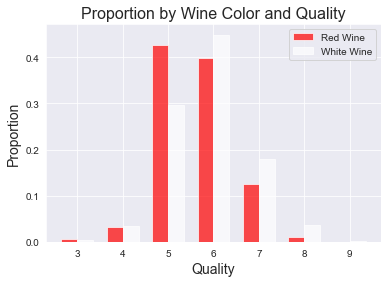

In [83]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('Quality',fontsize=14)
plt.title('Proportion by Wine Color and Quality',fontsize=16)
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)
plt.xticks(fontsize=10)
# legend
plt.legend();

> **It appears that the mean quality of red wine is less than that of white wine.**

### Q3: What level of acidity (pH value) receives the highest average rating?

In [40]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [41]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 2.72,3.11,3.21, 3.32,4.01] # Fill in this list with five values you just found

In [42]:
# Labels for the four acidity level groups
bin_names = [ "High", "Moderately High", "Medium","Low" ] # Name each acidity level category

In [43]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

In [44]:
# Checks for successful creation of this column
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [45]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby(['quality','acidity_levels']).mean()

fixed_acidity  volatile_acidity  citric_acid  \
quality acidity_levels                                                  
3       High                  9.157143          0.367143     0.361429   
        Moderately High       8.075000          0.365000     0.372500   
        Medium                7.837500          0.553125     0.296250   
        Low                   6.954545          0.641364     0.185455   
4       High                  7.825758          0.361439     0.378485   
        Moderately High       7.217073          0.418415     0.279024   
        Medium                7.176596          0.457340     0.281915   
        Low                   6.850000          0.587339     0.147581   
5       High                  7.622648          0.329660     0.388972   
        Moderately High       7.384729          0.357980     0.328407   
        Medium                7.246926          0.409355     0.278566   
        Low                   6.971092          0.483929     0.211349   
6       High                  7.476579          0.275303     0.363671   
        Moderately High       7.324636          0.291691     0.348601   
        Medium                7.116667          0.318597     0.325142   
        Low                   6.756769          0.373945     0.252737   
7       High                  7.502642          0.258377     0.356566   
        Moderately High       7.475194          0.286008     0.357752   
        Medium                7.045817          0.295570     0.345970   
        Low                   6.560751          0.312696     0.284744   
8       High                  7.255556          0.280444     0.333111   
        Moderately High       7.111364          0.286250     0.334091   
        Medium                6.894231          0.268269     0.352308   
        Low                   6.178846          0.326923     0.310962   
9       High                       NaN               NaN          NaN   
        Moderately High       9.100000          0.270000     0.450000   
        Medium                7.150000          0.300000     0.350000   
        Low                   6.850000          0.310000     0.390000   

                         residual_sugar  chlorides  free_sulfur_dioxide  \
quality acidity_levels                                                    
3       High                   9.221429   0.073857            36.928571   
        Moderately High        4.337500   0.081750            17.250000   
        Medium                 4.975000   0.079375            36.187500   
        Low                    2.954545   0.075636            50.863636   
4       High                   5.028030   0.059712            22.121212   
        Moderately High        4.741463   0.051683            27.475610   
        Medium                 3.865957   0.054936            16.819149   
        Low                    3.052419   0.069839            17.427419   
5       High                   7.501829   0.065510            33.822300   
        Moderately High        6.105255   0.061890            33.587849   
        Medium                 5.415676   0.063689            28.864754   
        Low                    3.730621   0.068270            22.896146   
6       High                   7.026842   0.051672            34.109211   
        Moderately High        6.079082   0.052608            33.527697   
        Medium                 4.735755   0.054623            29.722222   
        Low                    4.206477   0.058009            27.002911   
7       High                   6.778679   0.043283            31.296226   
        Moderately High        5.193411   0.044702            32.395349   
        Medium                 3.579848   0.046456            28.623574   
        Low                    3.507679   0.046512            29.508532   
8       High                   7.386667   0.041289            36.022222   
        Moderately High        6.719318   0.045977            35.431818   
        Medium                 4.5

> **From the data it appears that the low level of acidity receives the highest mean quality rating.**

### Q4: Do wines with higher alcoholic content receive better ratings?

In [46]:
# get the median amount of alcohol content
wine_df['alcohol'].median()

10.3

In [47]:
# select samples with alcohol content less than the median
low_alcohol =wine_df.query("alcohol < 10.3")

# select samples with alcohol content greater than or equal to the median
high_alcohol =wine_df.query("alcohol >= 10.3")

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [48]:
# get mean quality rating for the low alcohol and high alcohol groups
print(low_alcohol['quality'].mean())
print(high_alcohol['quality'].mean())

5.475920679886686
6.146084337349397


In [55]:
# Use query to select each group and get its mean quality
median = wine_df['alcohol'].median()
low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

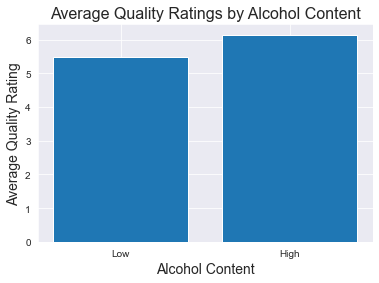

In [57]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content',fontsize=16)
plt.xlabel('Alcohol Content',fontsize=14)
plt.ylabel('Average Quality Rating',fontsize=14);

> **It appears from the data that wines with higher alcoholic content generally receive better ratings.**

### Q5: Do sweeter wines (more residual sugar) receive better ratings?

In [50]:
# get the median amount of residual sugar
wine_df['residual_sugar'].median()

3.0

In [51]:
# select samples with residual sugar less than the median
low_sugar = wine_df.query('residual_sugar < 3.0')

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df.query('residual_sugar >= 3.0')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [52]:
# get mean quality rating for the low sugar and high sugar groups
print(low_sugar['quality'].mean())
print(high_sugar['quality'].mean())

5.808800743724822
5.82782874617737


In [58]:
# Use query to select each group and get its mean quality
median = wine_df['residual_sugar'].median()
low = wine_df.query('residual_sugar < {}'.format(median))
high = wine_df.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

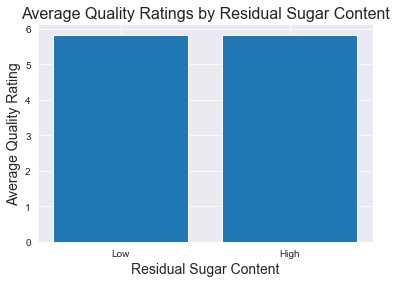

In [59]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar Content',fontsize=16)
plt.xlabel('Residual Sugar Content',fontsize=14)
plt.ylabel('Average Quality Rating',fontsize=14);

> **It appears from the data that  sweeter wines generally receive higher ratings.**

### Q6: What level of acidity receives the highest average rating?

In [61]:
# Use groupby to get the mean quality for each acidity level

High = wine_df.query('acidity_levels == "High"').median()
Low = wine_df.query('acidity_levels == "Low"').median()
Medium = wine_df.query('acidity_levels == "Medium"').median()
Moderately_High = wine_df.query('acidity_levels == "Moderately High"').median()

mean_quality_low = Low['quality'].mean()
mean_quality_high = High['quality'].mean()
mean_quality_Medium = Medium['quality'].mean()
mean_quality_Moderately_High = Moderately_High['quality'].mean()

C:\Users\Batman\AppData\Local\Temp/ipykernel_10692/3559311079.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  High = wine_df.query('acidity_levels == "High"').median()
C:\Users\Batman\AppData\Local\Temp/ipykernel_10692/3559311079.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Low = wine_df.query('acidity_levels == "Low"').median()
C:\Users\Batman\AppData\Local\Temp/ipykernel_10692/3559311079.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Medium = wine_df.query('acidity_le

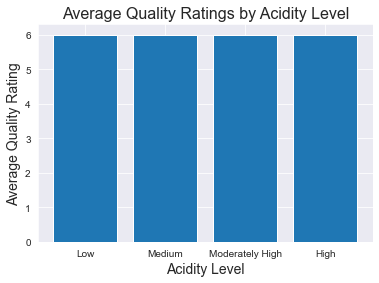

In [64]:
# Create a bar chart with proper labels
locations = [ 1, 2, 3,4 ]
heights = [ mean_quality_low,mean_quality_Medium,mean_quality_Moderately_High,mean_quality_high]
labels = ['Low', "Medium","Moderately High" ,'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level',fontsize=16)
plt.xlabel('Acidity Level',fontsize=14)
plt.ylabel('Average Quality Rating',fontsize=14);


>**It appears from the data that the all level of acidity receives simillar ratings.**

<a id='conclusions'></a>
## Conclusions

> From the data and the graphs we can conclude several points: <br />
<br />
**a)** Based on scatterplots of quality against different feature variables, Alcohol is most likely to have a positive impact on quality.<br />
 <br />
**b)** It appears that the mean quality of red wine is less than that of white wine.<br />
<br />
**c)** From the data it appears that the low level of acidity receives the highest mean quality rating.<br />
<br />
**d)** It appears from the data that wines with higher alcoholic content generally receive better ratings.<br />
<br />
**e)** It appears from the data that sweeter wines generally receive higher ratings.<br />
<br />
**f)** It appears from the data that the all level of acidity receives simillar ratings.<br />
<br />

